<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EM-算法(Expectation-Maximization)引入" data-toc-modified-id="EM-算法(Expectation-Maximization)引入-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EM 算法(Expectation Maximization)引入</a></span></li><li><span><a href="#李航书本-EM-算法引入" data-toc-modified-id="李航书本-EM-算法引入-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>李航书本 EM 算法引入</a></span></li><li><span><a href="#EM-算法" data-toc-modified-id="EM-算法-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EM 算法</a></span></li><li><span><a href="#抛硬币例子实现" data-toc-modified-id="抛硬币例子实现-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>抛硬币例子实现</a></span><ul class="toc-item"><li><span><a href="#李航9.1手算求解一步" data-toc-modified-id="李航9.1手算求解一步-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>李航9.1手算求解一步</a></span><ul class="toc-item"><li><span><a href="#E-步" data-toc-modified-id="E-步-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>E 步</a></span></li><li><span><a href="#M-步" data-toc-modified-id="M-步-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>M 步</a></span></li></ul></li><li><span><a href="#python代码实现上例" data-toc-modified-id="python代码实现上例-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>python代码实现上例</a></span></li></ul></li><li><span><a href="#混合高斯分布的求解" data-toc-modified-id="混合高斯分布的求解-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>混合高斯分布的求解</a></span><ul class="toc-item"><li><span><a href="#李航书本9.3手算求解一步" data-toc-modified-id="李航书本9.3手算求解一步-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>李航书本9.3手算求解一步</a></span><ul class="toc-item"><li><span><a href="#取初值：" data-toc-modified-id="取初值：-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>取初值：</a></span></li><li><span><a href="#E-步：" data-toc-modified-id="E-步：-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>E 步：</a></span></li><li><span><a href="#M-步：" data-toc-modified-id="M-步：-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>M 步：</a></span></li></ul></li><li><span><a href="#python代码实现上例" data-toc-modified-id="python代码实现上例-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>python代码实现上例</a></span></li></ul></li></ul></div>

# EM 算法(Expectation Maximization)引入
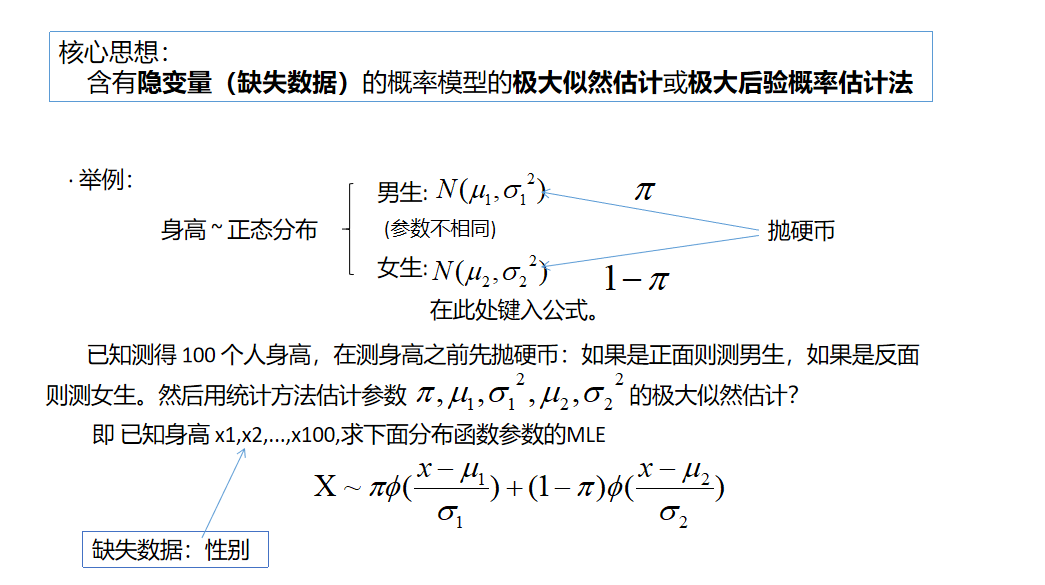
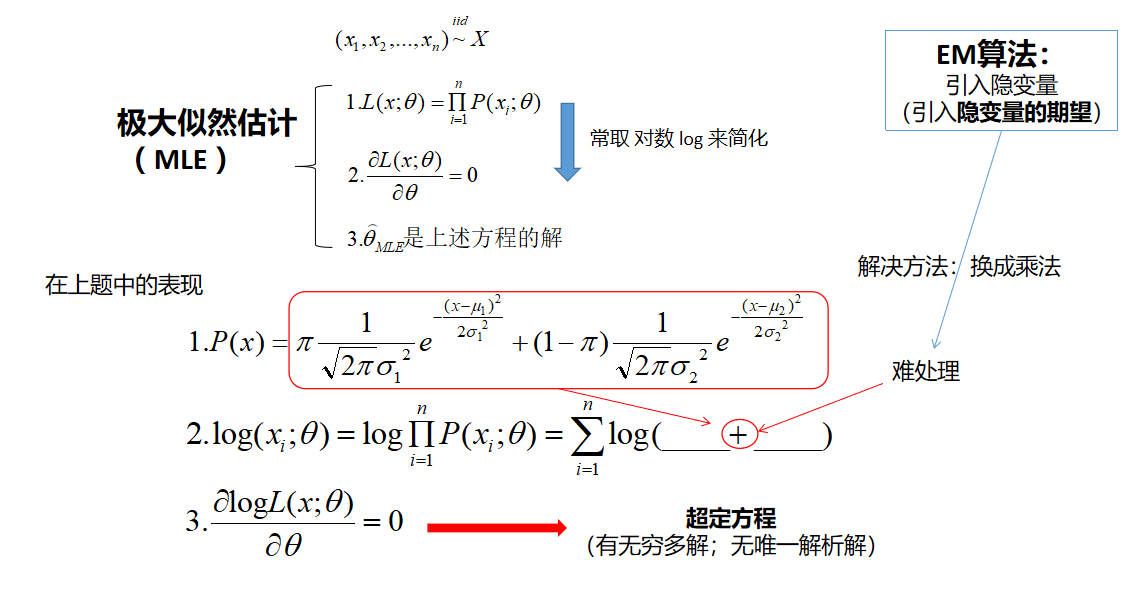

# 李航书本 EM 算法引入
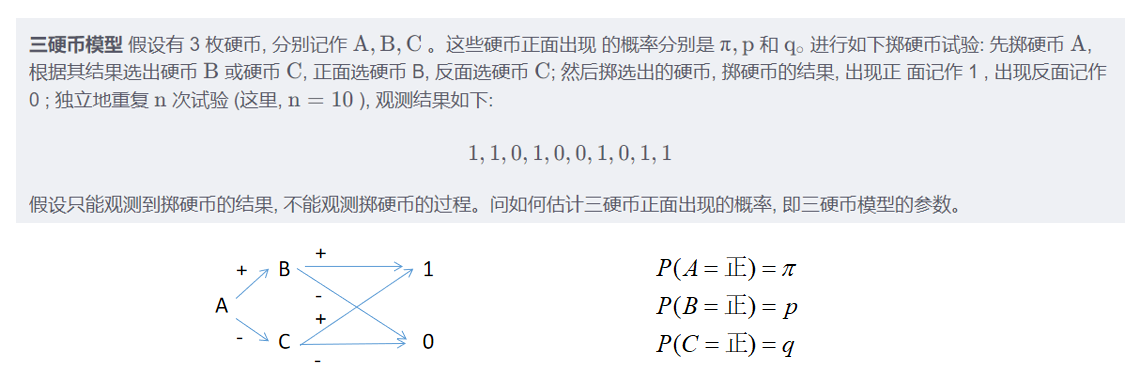
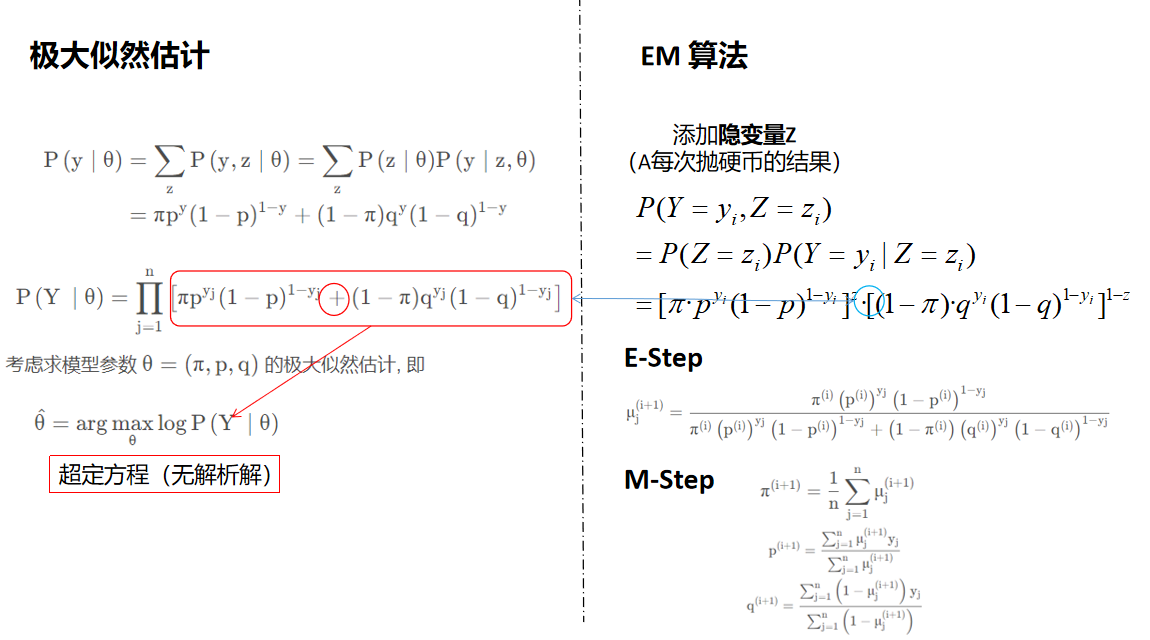

# EM 算法

===============================================================================================================

输入: 观测变量数据 $Y$, 隐变量数据 $Z$, 联合分布 $P(Y, Z \mid \theta)$, 条件分布 $P(Z \mid Y, \theta)$; 

输出: 模型参数 $\theta$ 。

1. 选择参数的初值 $\theta^{(0)}$ ，开始迭代;

2. $E$ 步: 记 $\theta^{(\mathrm{i})}$ 为第 $i$ 次迭代参数 $\theta$ 的估计值, 在第 $i+1$ 次迭代的 $E$ 步, 计算
$$
\begin{aligned}
\mathrm{Q}\left(\theta, \theta^{(\mathrm{i})}\right) &=\mathrm{E}_{\mathrm{Z}}\left[\log \mathrm{P}(\mathrm{Y}, \mathrm{Z} \mid \theta) \mid \mathrm{Y}, \theta^{(\mathrm{i})}\right] \\
&=\sum_{\mathrm{Z}} \log \mathrm{P}(\mathrm{Y}, \mathrm{Z} \mid \theta) \mathrm{P}\left(\mathrm{Z} \mid \mathrm{Y}, \theta^{(\mathrm{i})}\right)
\end{aligned}
$$
这里, $\mathrm{P}\left(\mathrm{Z} \mid \mathrm{Y}, \theta^{(\mathrm{i})}\right)$ 是在给定观测数据 $\mathrm{Y}$ 和当前的参数估计 $\theta^{(\mathrm{i})}$ 下隐变量数据 $\mathrm{Z}$ 的条概率分布;

3. M 步: 求使 $\mathrm{Q}\left(\theta, \theta^{(\mathrm{i})}\right)$ 极大化的 $\theta$, 确定第 $\mathrm{i}+1$ 次迭代的参数的估计值 $\theta^{(\mathrm{i}+1)}$
$$
\theta^{(\mathrm{i}+1)}=\arg \max _\theta \mathrm{Q}\left(\theta, \theta^{(\mathrm{i})}\right)
$$

4. 重复第 $(2)$步和第 $(3)$ 步, 直到收敛。

===============================================================================================================

# 抛硬币例子实现
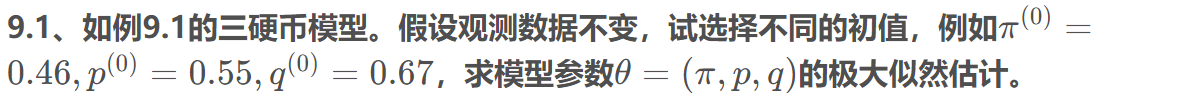

* ## 李航9.1手算求解一步

* ### E 步
$$\mu_{\mathrm{1}}^{(1)}=\frac{\pi^{(0)}\left(\mathrm{p}^{(0)}\right)^{\mathrm{y}_{\mathrm{1}}}\left(1-\mathrm{p}^{(0)}\right)^{1-\mathrm{y}_{\mathrm{1}}}}{\pi^{(0)}\left(\mathrm{p}^{(0)}\right)^{\mathrm{y}_{1}}\left(1-\mathrm{p}^{(0)}\right)^{1-\mathrm{y}_{\mathrm{1}}}+\left(1-\pi^{(0)}\right)\left(\mathrm{q}^{(0)}\right)^{\mathrm{y}_{\mathrm{1}}}\left(1-\mathrm{q}^{(0)}\right)^{1-\mathrm{y}_{\mathrm{1}}}}=\frac{0.46·0.55}{0.46·0.55+(1-0.46)·0.67}=0.412$$

$$同理，其他结果为1的结果同上，即\mu_2^{(1)},\mu_4^{(1)}，\mu_7^{(1)}，\mu_9^{(1)}，\mu_{10}^{(1)}值和\mu_1^{(1)}相同$$

$$\mu_{\mathrm{3}}^{(1)}=\frac{\pi^{(0)}\left(\mathrm{p}^{(0)}\right)^{\mathrm{y}_{\mathrm{3}}}\left(1-\mathrm{p}^{(0)}\right)^{1-\mathrm{y}_{\mathrm{3}}}}{\pi^{(0)}\left(\mathrm{p}^{(0)}\right)^{\mathrm{y}_{3}}\left(1-\mathrm{p}^{(0)}\right)^{1-\mathrm{y}_{\mathrm{3}}}+\left(1-\pi^{(0)}\right)\left(\mathrm{q}^{(0)}\right)^{\mathrm{y}_{\mathrm{3}}}\left(1-\mathrm{q}^{(0)}\right)^{1-\mathrm{y}_{\mathrm{3}}}}=\frac{0.46·(1-0.55)}{0.46·(1-0.55)+(1-0.46)·(1-0.67)}=0.537$$

$$同理，其他结果为0的结果同上，即\mu_5^{(1)},\mu_6^{(1)}，\mu_8^{(1)}值和\mu_3^{(1)}相同$$

所以$$\hat\mu_1=[0.412,0.412,0.537,0.412,0.537,0.537,0.412,0.537,0.412,0.412]$$

* ### M 步
\begin{gathered}
\pi^{(1)}=\frac{1}{\mathrm{n}} \sum_{\mathrm{j}=1}^{\mathrm{n}} \mu_{\mathrm{j}}^{(1)}=\frac{6·0.412+4·0.537}{10}=0.462\\
\mathrm{p}^{(1)}=\frac{\sum_{\mathrm{j}=1}^{\mathrm{n}} \mu_{\mathrm{j}}^{(1)} \mathrm{y}_{\mathrm{j}}}{\sum_{\mathrm{j}=1}^{\mathrm{n}} \mu_{\mathrm{j}}^{(1)}}=\frac{6·0.412·1+4·0.537·0}{6·0.412+4·0.537}=0.535 \\
\mathrm{q}^{(1)}=\frac{\sum_{\mathrm{j}=1}^{\mathrm{n}}\left(1-\mu_{\mathrm{j}}^{(1)}\right) \mathrm{y}_{\mathrm{j}}}{\sum_{\mathrm{j}=1}^{\mathrm{n}}\left(1-\mu_{\mathrm{j}}^{(1)}\right)}=\frac{6·(1-0.412)·1+4·(1-0.537)·0}{6·(1-0.412)+4·(1-0.537)}=0.656
\end{gathered}

故第一次迭代结果是：
$$\pi^{(1)}=0.462\\
p^{(1)}=0.535\\
q^{(1)}=0.656$$

* ## python代码实现上例

In [16]:
import numpy as np
#import pandas as pd


def dist(a, b):
    return np.max(np.abs(a - b))


class EM_algorithm(object):
    def __init__(self, Y, pi, p, q, error=1e-04):
        self.y = Y
        self.pi = pi
        self.p = p
        self.q = q
        self.epslon = error

    def em_esti(self):
        result = list()
        number = 0
        flag = True
        #old=[self.pi,self.p,self.q]
        #new=np.zeros(shape=3)
        pi = self.pi
        p = self.p
        q = self.q
        while flag:
            #E-step:
            print("mu值是")
            mu = np.zeros(shape=len(self.y))
            for i in range(len(self.y)):
                temp1 = pi * p**self.y[i] * (1 - p)**(1 - self.y[i])
                temp2 = (1 - pi) * q**self.y[i] * (1 - q)**(1 - self.y[i])
                mu[i] = temp1 / (temp1 + temp2)
                print(mu[i])
            #M-step:
            ppi = np.sum(mu) / len(self.y)
            pp = np.dot(mu, self.y) / np.sum(mu)
            qq = np.dot(1 - mu, self.y) / np.sum(1 - mu)
            print('===============')

            number += 1
            result.append(np.array([number, ppi, pp, qq]))
            flag = (dist(np.array([pi, p, q]), np.array([ppi, pp, qq])) >
                    self.epslon)
            pi = ppi
            p = pp
            q = qq
            print("迭代结果是")
            print(pi)
            print(p)
            print(q)
            print('===============')
        return result


Y_train = np.array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1])
#theta0=np.array([0.4,0.6,0.7])

eme = EM_algorithm(Y_train, 0.46, 0.55, 0.67, 0.00001)
print(eme.em_esti())

mu值是
0.41151594014313597
0.41151594014313597
0.5373831775700935
0.41151594014313597
0.5373831775700935
0.5373831775700935
0.41151594014313597
0.5373831775700935
0.41151594014313597
0.41151594014313597
迭代结果是
0.461862835113919
0.5345950037850113
0.6561346417857324
mu值是
0.411515940143136
0.411515940143136
0.5373831775700935
0.411515940143136
0.5373831775700935
0.5373831775700935
0.411515940143136
0.5373831775700935
0.411515940143136
0.411515940143136
迭代结果是
0.461862835113919
0.5345950037850113
0.6561346417857324
[array([1.        , 0.46186284, 0.534595  , 0.65613464]), array([2.        , 0.46186284, 0.534595  , 0.65613464])]


# 混合高斯分布的求解

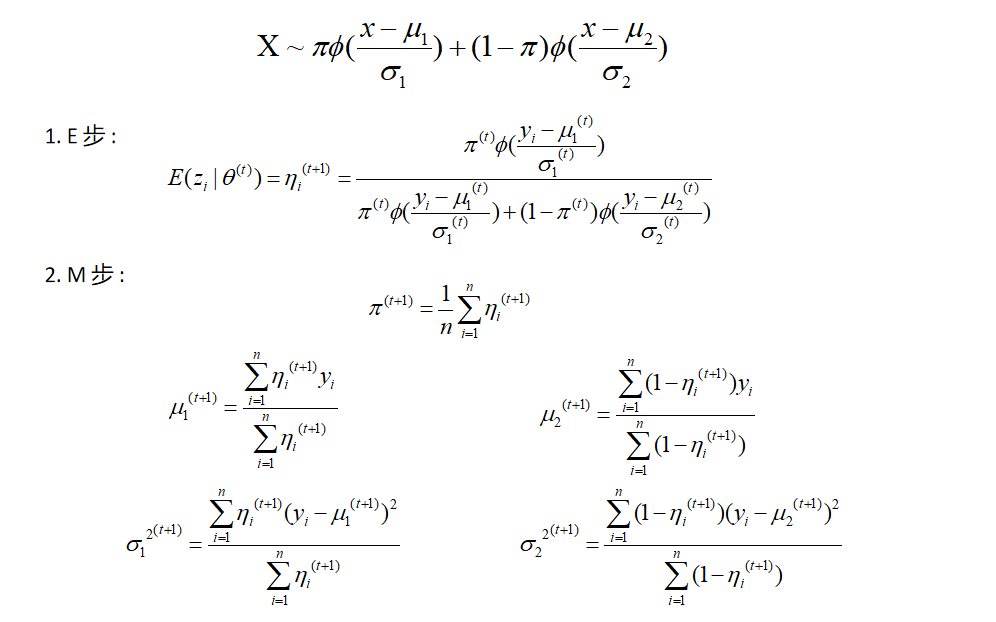

* ## 李航书本9.3手算求解一步
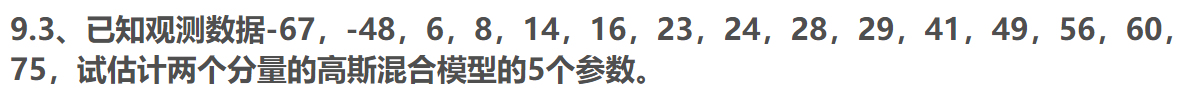

* ### 取初值：
为了更快收敛，假设初值来自两个不同的正态分布总体，前8个数据为一组，后7个为一组，分别计算出其对应的样本均值和方差。
$$\pi^{(0)}=\frac{8}{15}=0.533$$
$$\mu_1^{0}=\frac{-67-48+6+8+14+16+23+24}{8}=-3$$
$$\sigma_1^{2(0)}=\frac{(-67+3)^2+(-48+3)^2+(6+3)^2+(8+3)^2+(14+3)^2+(16+3)^2+(23+3)^2+(24+3)^2}{8}=1047.25$$
$$\mu_2^{0}=\frac{28+29+41+49+56+60+75}{7}=48.286$$
$$\sigma_2^{2(0)}=\frac{(28-48.486)^2+(29-48.486)^2+(41-48.486)^2+(49-48.486)^2+(56-48.486)^2+(60-48.486)^2+(75-48.486)^2}{7}=249.633$$

* ### E 步：
$$\eta_1^{(1)}=\frac{\pi^{(0)}\phi(\frac{y_i-\mu^{(0)}_1}{\sigma^{(0)}_1})}{\pi^{(0)}\phi(\frac{y_i-\mu^{(0)}_1}{\sigma^{(0)}_1})+(1-\pi^{(0)})\phi(\frac{y_i-\mu^{(0)}_2}{\sigma^{(0)}_2})}=0.232$$
同理，剩下的 $\eta$ 为

$$\eta_2=0.227,\eta_3=0.217,\eta_4=0.216$$
$$\eta_5=0.216,\eta_6=0.215,\eta_7=0.215$$
$$\eta_8=0.215,\eta_9=0.215,\eta_{10}=0.215$$
$$\eta_{11}=0.214,\eta_{12}=0.214,\eta_{13}=0.214$$
$$\eta_{14}=0.214,\eta_{15}=0.215$$


* ### M 步：

$$\pi^{(1)}=\frac{\sum^n_{i=1}\eta_i}{n}$$
$$=\frac{0.232+0.227+0.217+0.216+0.216+0.215+0.215+0.215+0.215+0.215+0.214+0.214+0.214+0.214+0.215}{15}=0.217$$

$$--------------------------------------------------------------$$
$$\mu_1^{(1)}=\frac{\sum^n_{i=1}\eta_i y_i}{\sum^n_{i=1}\eta_i}=$$
$=\frac{-67·0.232-48·0.227+6·0.217+ 8·0.216+14·0.216+16·0.215+23·0.215+24·0.215+28·0.215+29·0.215+41·0.214+49·0.214+56·0.214+60·0.214+75·0.215}{0.232+0.227+0.217+0.216+0.216+0.215+0.215+0.215+0.215+0.215+0.214+0.214+0.214+0.214+0.215}=20.156 $

$$--------------------------------------------------------------$$
$$\mu_2^{(1)}=\frac{\sum^n_{i=1}(1-\eta_i) y_i}{\sum^n_{i=1}(1-\eta_i)}$$
$=\frac{-67·0.768-48·0.773+6·0.783+ 8·0.784+14·0.784+16·0.785+23·0.785+24·0.785+28·0.785+29·0.785+41·0.786+49·0.786+56·0.786+60·0.786+75·0.785}{0.768+0.773+0.783+0.784+0.784+0.785+0.785+0.785+0.785+0.785+0.786+0.786+0.786+0.786+0.785}=21.149$
$$--------------------------------------------------------------$$
$$\sigma_1^{2(1)}=\frac{\sum^n_{i=1}\eta_i (y_i-\mu^{(1)}_1)^2}{\sum^n_{i=1}\eta_i}$$
$=\frac{(-67-20.156)^2·0.232-(48-20.156)^2·0.227+(6-20.156)^2·0.217+(8-20.156)^2·0.216+(14-20.156)^2·0.216+(16-20.156)^2·0.215+(23-20.156)^2·0.215+(24-20.156)^2·0.215+(28-20.156)^2·0.215+(29-20.156)^2·0.215+(41-20.156)^2·0.214+(49-20.156)^2·0.214+(56-20.156)^2·0.214+(60-20.156)^2·0.214+(75-20.156)^2·0.215}{0.232+0.227+0.217+0.216+0.216+0.215+0.215+0.215+0.215+0.215+0.214+0.214+0.214+0.214+0.215}\\
=1374.615$
$$--------------------------------------------------------------$$

$$\sigma_2^{2(1)}=\frac{\sum^n_{i=1}(1-\eta_i) (y_i-\mu^{(1)}_2)^2}{\sum^n_{i=1}(1-\eta_i)}$$
$=\frac{(-67-21.149)^2·0.768-(48-21.149)^2·0.773+(6-21.149)^2·0.783+(8-21.149)^2·0.784+(14-21.149)^2·0.784+(16-21.149)^2·0.785+(23-21.149)^2·0.785+(24-21.149)^2·0.785+(28-21.149)^2·0.785+(29-21.149)^2·0.785+(41-21.149)^2·0.786+(49-21.149)^2·0.786+(56-21.149)^2·0.786+(60-21.149)^2·0.786+(75-21.149)^2·0.785}{0.768+0.773+0.783+0.784+0.784+0.785+0.785+0.785+0.785+0.785+0.786+0.786+0.786+0.786+0.785}\\
=1317.004$

即第一次迭代结果是
$$\pi^{(1)}=0.217\\
\mu_1^{(1)}=20.156\\
\mu_2^{(1)}=21.149\\
\sigma_1^{2(1)}=1374.615\\
\sigma_2^{2(1)}=1317.004
$$

* ## python代码实现上例

In [24]:
import numpy as np

arr1 = [-67, -48, 6, 8, 14, 16, 23, 24]
arr2 = [28, 29, 41, 49, 56, 60, 75]
#求方差
arr_1 = np.mean(arr1)
arr_2 = np.mean(arr2)
#求方差
arr_var1 = np.var(arr1)
arr_var2 = np.var(arr2)
print("均值1为：%f" % arr_1)
print("方差1为：%f" % arr_var1)
print("均值2为：%f" % arr_2)
print("方差2为：%f" % arr_var2)

均值1为：-3.000000
方差1为：1047.250000
均值2为：48.285714
方差2为：249.632653


In [4]:
import numpy as np
#import pandas as pd
from scipy import stats
#prob = stats.norm.pdf(x, mu, sigma)


def dist(a, b):
    return np.sqrt(np.dot(a - b, a - b))


class EM_MG(object):
    def __init__(self, Y, theta, mu1, sigma1, mu2, sigma2, error=1e-04):
        self.y = Y
        self.theta = theta
        self.mu1 = mu1
        self.sigma1 = sigma1
        self.mu2 = mu2
        self.sigma2 = sigma2
        self.epslon = error

    def em_estimate(self):
        result = list()
        number = 0
        flag = True
        #old=[self.pi,self.p,self.q]
        #new=np.zeros(shape=3)
        theta = self.theta
        mu1 = self.mu1
        sigma1 = self.sigma1
        mu2 = self.mu2
        sigma2 = self.sigma2
        while flag:
            #E-step:
            print('eta值为：')
            the = np.zeros(shape=len(self.y))
            for i in range(len(self.y)):
                temp1 = theta * stats.norm.pdf(self.y[i], mu1, sigma1)
                temp2 = (1 - theta) * stats.norm.pdf(self.y[i], mu2, sigma2)
                the[i] = temp1 / (temp1 + temp2)
                print(the[i])
            print('========')
            #M-step:
            print("迭代结果是：")
            ttheta = np.sum(the) / len(self.y)
            mmu1 = np.dot(the, self.y) / np.sum(the)
            mmu2 = np.dot(1 - the, self.y) / np.sum(1 - the)
            ssigma1 = np.dot(the, (self.y - mmu1)**2) / np.sum(the)
            ssigma2 = np.dot(1 - the, (self.y - mmu2)**2) / np.sum(1 - the)
            print(mmu1, mmu2, ssigma1, ssigma2)
            print('========')
            number += 1
            result.append(
                np.array([number, ttheta, mmu1, ssigma1, mmu2, ssigma2]))
            flag = (dist(np.array([theta, mu1, sigma1, mu2, sigma2]),
                         np.array([ttheta, mmu1, ssigma1, mmu2, ssigma2])) >
                    self.epslon)
            theta = ttheta
            mu1 = mmu1
            sigma1 = ssigma1
            mu2 = mmu2
            sigma2 = ssigma2
        return result


Y_train = np.array(
    [-67, -48, 6, 8, 14, 16, 23, 24, 28, 29, 41, 49, 56, 60, 75])
"""
假设第一个总体抽了8个(8/15)，第二个总体抽了7个(7/15)
均值1为：-3.000000
方差1为：1047.250000
均值2为：48.285714
方差2为：249.632653
"""

eme = EM_MG(Y_train, 0.533, -3.000000, 1047.250000, 48.285714, 249.632653,
            0.00001)
print(eme.em_estimate())

eta值为：
0.23201499895536518
0.22648303027266414
0.2162880449079133
0.21606043731684485
0.2154400477497254
0.21525399113729393
0.2146840803022784
0.21461295835114647
0.21435412955617691
0.21429582872160718
0.2137954872209791
0.21366576265484055
0.21368578308717448
0.21375317967161647
0.21436906560740987
迭代结果是：
20.155308887730822 21.148426510330545 1374.6283868116152 1317.0172323971174
eta值为：
0.20944555974973078
0.20943220038765925
0.20940967320036957
0.20940927753230776
0.20940827851855692
0.20940800817708527
0.2094073087162072
0.20940724012444875
0.20940704408522967
0.2094070146573584
0.20940727247872457
0.20940807098261688
0.20940918089836302
0.20940998746045492
0.20941412828336878
迭代结果是：
20.931870471380158 20.933720819749972 1329.7687581236194 1329.6340020176865
eta值为：
0.20939599384553245
0.2093959622727884
0.2093959099447695
0.20939590906944552
0.20939590689893825
0.20939590632725727
0.2093959049241713
0.20939590479964115
0.20939590449129764
0.209395904461656
0.20939590558621599
0.20